<a href="https://colab.research.google.com/github/islambouchou/BERTopic-Research-paper-topics-/blob/main/BERTopic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install bertopic==0.16.0 datasets==2.16.1

INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 360.5/360.5 kB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.4/166.4 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 99.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.4/126.4 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/

In [ ]:
from datasets import load_dataset
import pandas as pd
import numpy as np
import re
import random
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

from nltk.tokenize import word_tokenize

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

def clean_text(text: str):
    if not isinstance(text, str):
        # raise TypeError("text must be a string")
        return ""

    # remove urls
    text = re.sub(r"http\S+", " url ", text)

    # replace any digit with number
    text = re.sub(r"\d+", "", text)

    # set space before and after any punctuation
    text = re.sub(r"([^\w\s])", r" \1 ", text)

    # remove extra spaces
    text = re.sub(r"\s+", " ", text)

    words = word_tokenize(text)
    text = " ".join([ w for w in words if len(w) > 1 ] )

    return text.lower().strip()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
dataset=load_dataset("zelalt/scientific-papers")

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'title', 'full_text'],
        num_rows: 1754
    })
})

In [ ]:
dataset['train'][0]

In [ ]:
raw_dataset = [
    {
        "text": rec["full_text"],
        "title": rec["title"],
    }
    for rec in dataset['train']
]

In [ ]:
raw_dataset[0]

{'text': 'Sparsity-certifying Graph Decompositions\nIleana Streinu1∗, Louis Theran2\n1 Department of Computer Science, Smith College, Northampton, MA. e-mail: streinu@cs.smith.edu\n2 Department of Computer Science, University of Massachusetts Amherst. e-mail: theran@cs.umass.edu\nAbstract. We describe a new algorithm, the (k, `)-pebble game with colors, and use it to obtain a charac-\nterization of the family of (k, `)-sparse graphs and algorithmic solutions to a family of problems concern-\ning tree decompositions of graphs. Special instances of sparse graphs appear in rigidity theory and have\nreceived increased attention in recent years. In particular, our colored pebbles generalize and strengthen\nthe previous results of Lee and Streinu [12] and give a new proof of the Tutte-Nash-Williams characteri-\nzation of arboricity. We also present a new decomposition that certifies sparsity based on the (k, `)-pebble\ngame with colors. Our work also exposes connections between pebble game a

In [ ]:
raw_dataset_df = pd.DataFrame(raw_dataset)
raw_dataset_df = raw_dataset_df.sample(frac=1, random_state=101)
raw_dataset_df.shape


(1754, 2)

In [ ]:
raw_dataset_df.head()

,text,title
584,ON THE NUMBER OF MODULI OF PLANE SEXTICS WITH\...,On the number of moduli of plane sextics with ...
1240,A Dynamic Algorithm for Blind Separation of\nC...,A Dynamic Algorithm for Blind Separation of Co...
1279,Reconstructing the Intrinsic Triaxial Shape of...,Reconstructing the Intrinsic Triaxial Shape of...
1472,EFI-07-08\nBaryon Number-Induced Chern-Simons ...,Baryon Number-Induced Chern-Simons Couplings o...
157,"Mon. Not. R. Astron. Soc. 000, 1–10 (????) Pri...",Radiative losses and cut-offs of energetic par...


In [ ]:
import nltk
nltk.download('punkt_tab')
raw_dataset_df['text'] = raw_dataset_df['text'].apply(clean_text)
raw_dataset_df['title'] = raw_dataset_df['title'].apply(clean_text)


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
raw_dataset_df['text_len'] = raw_dataset_df['text'].apply(len)

.hearaw_dataset_dfd()

,text,title,text_len
584,on the number of moduli of plane sextics with ...,on the number of moduli of plane sextics with ...,20925
1240,dynamic algorithm for blind separation of conv...,dynamic algorithm for blind separation of conv...,29773
1279,reconstructing the intrinsic triaxial shape of...,reconstructing the intrinsic triaxial shape of...,22236
1472,efi baryon number induced chern simons couplin...,baryon number induced chern simons couplings o...,14037
157,mon not astron soc printed november mn latex s...,radiative losses and cut offs of energetic par...,29312


<Axes: xlabel='text_len', ylabel='Count'>

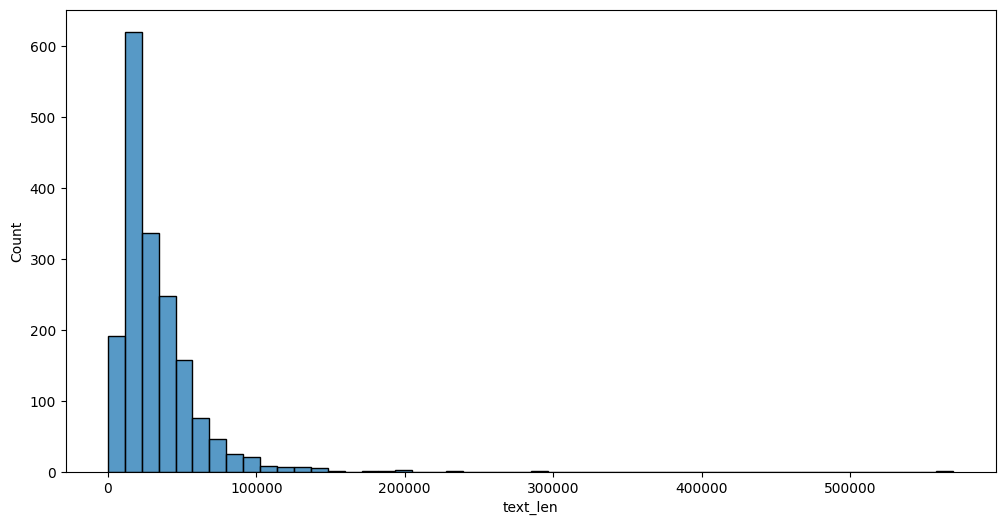

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(raw_dataset_df['text_len'], bins=50)

In [ ]:
raw_dataset_df.shape

(1754, 3)

In [ ]:
print(raw_dataset_df.shape)
raw_dataset_df = raw_dataset_df[ raw_dataset_df['text_len'] <= 200000 ]
print(raw_dataset_df.shape)

(1754, 3)
(1750, 3)


## * Embeding

In [ ]:
from sentence_transformers import SentenceTransformer
#model_id = 'sentence-transformers/distiluse-base-multilingual-cased-v2'
model_id = 'sentence-transformers/LaBSE'
embedding_model = SentenceTransformer(model_id)

In [ ]:
#transforme texts to embedding (vector)
news_embeddings = embedding_model.encode(raw_dataset_df['text'].values, show_progress_bar=True)

Batches:   0%|          | 0/55 [00:00<?, ?it/s]

In [ ]:
news_embeddings.shape

(1750, 768)

In [ ]:
news_embeddings[0]

array([-3.64935957e-02,  3.35187018e-02,  1.24179544e-02, -1.14328042e-03,
        3.18762846e-02, -4.27407707e-04, -3.06748115e-02,  3.60058211e-02,
       -1.57141965e-02,  1.82256778e-03,  7.39469752e-03, -3.51124853e-02,
       -2.59619579e-02, -7.18871877e-02, -5.26538193e-02, -1.61926951e-02,
        5.54288961e-02,  3.93488929e-02, -6.84201196e-02,  2.93934811e-02,
        3.15154865e-02, -1.53136747e-02, -2.11657267e-02,  2.84425598e-02,
       -2.91337725e-02, -1.06624067e-02, -1.09816827e-02, -4.49001901e-02,
       -6.79606274e-02, -3.04094516e-04,  2.88563371e-02, -1.04588820e-02,
        1.40653003e-03, -4.46424522e-02, -2.25932207e-02, -2.77929772e-02,
        8.94909259e-03,  2.42839269e-02,  3.54702137e-02, -4.86279875e-02,
        1.23187341e-02, -4.81858961e-02, -6.98796213e-02,  2.73519307e-02,
       -6.64127525e-03, -2.40903199e-02, -5.25340177e-02,  5.14438525e-02,
       -2.36239601e-02, -4.77744453e-02,  4.06085625e-02, -6.10160641e-02,
        4.39017937e-02,  

Resultat : 1744 embedding of 512 dim (tres grand numbre)

# **Dim reduction**

In [ ]:
from umap import UMAP
# n_components = number of dimensions
umap_model = UMAP(n_neighbors=15, n_components=15,
                  min_dist=0.0, metric='cosine',
                  random_state=101)

In [ ]:
umap_model

UMAP(metric='cosine', min_dist=0.0, n_components=15, random_state=101)

# **Clustiring**

In [ ]:
from hdbscan import HDBSCAN

# A higher min_cluster_size will generate fewer topics
# A lower min_cluster_size will generate more topics.

hdbscan_model = HDBSCAN(min_cluster_size=50,
                        metric='euclidean',
                        cluster_selection_method='eom',
                        prediction_data=True)

# **Vectorizer**

In [ ]:
# array from text --> based on words in text--> use this to saparere les text and give name foreach topic
# so we need vector from embedding and also the tradutionl way off nlp
# df = documenet freq --> number of documents that word appare in

from sklearn.feature_extraction.text import CountVectorizer
#import arabicstopwords.arabicstopwords as stp
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize




nltk.download('stopwords')
print(stopwords.words('english'))
stop_words = list(stopwords.words('english'))
stop_words.append('et')
stop_words.append('le')
stop_words.append('la')

stop_words.append('also')
#stop_words = stp.stopwords_list()
#ngram_range=(1, 3) sentance like good morning
vectorizer_model = CountVectorizer(min_df=1,
                                   stop_words=stop_words,
                                   max_df=0.3, 1700*0.3
                                   analyzer='word',
                                   ngram_range=(1, 3)
                                   )

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Topic Representaion

In [ ]:
#use KeyBERT bto get keywords
from bertopic.representation import KeyBERTInspired

keybert_model = KeyBERTInspired()

representation_model = {
    "KeyBERT": keybert_model
}

# **Link the work we did**

In [ ]:
from bertopic import BERTopic

topic_model = BERTopic(
    # Pipeline models
    # embedding_model we create
    embedding_model=embedding_model,
    # umap_model we create
    umap_model=umap_model,
    # hdbscan_model we create
    hdbscan_model=hdbscan_model,
    # vectorizer_model we create
    vectorizer_model=vectorizer_model,
    # representation_model we create
    representation_model=representation_model,

    # Hyperparameters
    top_n_words=10,
    verbose=True
)
# fit_transform start working
# use text and embeddings
# fit_transform --> return 2 things 1/ topics = text with id of topic  2/ proba
topics, probs =  topic_model.fit_transform(
    raw_dataset_df['text'].values,
    news_embeddings
)

2024-11-26 11:17:13,528 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-11-26 11:17:21,976 - BERTopic - Dimensionality - Completed ✓
2024-11-26 11:17:21,977 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-11-26 11:17:22,089 - BERTopic - Cluster - Completed ✓
2024-11-26 11:17:22,094 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-11-26 11:19:39,681 - BERTopic - Representation - Completed ✓


In [ ]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,KeyBERT,Representative_Docs
0,-1,218,-1_energy_al_time_phys,"[energy, al, time, phys, fig, one, two, state,...","[particle, physics, number, quantum, one, phys...",[arxiv cond mat str el apr spectroscopic prope...
1,0,1243,0_one_phys_two_let,"[one, phys, two, let, case, function, given, o...","[math, equations, eq, quantum, equation, theor...",[arxiv math ph apr fermionic construction of t...
2,1,289,1_al_stars_mass_star,"[al, stars, mass, star, data, apj, galaxies, e...","[galaxies, galaxy, galactic, planets, de, stel...",[draft version october preprint typeset using ...


In [ ]:
print(topics)
print(probs)

[0, -1, 1, 0, 0, 0, 0, 0, 0, 0, 0, -1, 1, 0, -1, 0, 0, 1, 0, 0, 0, -1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, -1, 0, 0, 0, 0, -1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, -1, 1, 0, 0, 0, 0, 1, -1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, -1, 0, 1, 0, -1, 0, 0, 0, 0, 0, 0, 1, 0, -1, 0, 0, 0, 0, -1, 0, 0, 0, 1, 0, 0, -1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 1, -1, 0, -1, 0, 1, -1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, -1, 0, 1, 0, 0, -1, 0, 0, 0, 0, 0, 1, 0, 0, 1, -1, 1, 1, 0, 0, -1, 0, 1, 1, 0, 0, 0, -1, 0, 0, 0, 0, 0, -1, 0, 1, -1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, -1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, -1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, -1, 0, -1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, -1, 0, 0, 0, 0, 0, 0, -1, 0, 1, -1, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0

In [ ]:
hierarchical_topics = topic_model.hierarchical_topics(
    raw_dataset_df['text'].values
)

100%|██████████| 1/1 [00:01<00:00,  1.17s/it]


In [ ]:
topic_model.visualize_hierarchy(
    hierarchical_topics=hierarchical_topics
)

In [ ]:
topic_model.visualize_heatmap()

In [ ]:
raw_dataset_df.head()

,text,title,text_len
584,on the number of moduli of plane sextics with ...,on the number of moduli of plane sextics with ...,20925
1240,dynamic algorithm for blind separation of conv...,dynamic algorithm for blind separation of conv...,29773
1279,reconstructing the intrinsic triaxial shape of...,reconstructing the intrinsic triaxial shape of...,22236
1472,efi baryon number induced chern simons couplin...,baryon number induced chern simons couplings o...,14037
157,mon not astron soc printed november mn latex s...,radiative losses and cut offs of energetic par...,29312
